# Linear Regression
$$\hat{y}=\theta x$$
- cost funciton
$$
MSE(X, h_{\theta})=\frac{1}{m}\sum_{i=1}^{m}(\theta^T x^{(i)}-y^{(i)})^2
$$

## Normal Equation

$$
\hat{\theta}=(X^T X)^{-1}X^T y
$$

In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

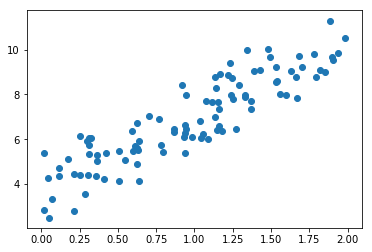

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[ 3.7799554 ],
       [ 3.21195542]])

In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_pred = X_new_b.dot(theta_best)
y_pred

array([[  3.7799554 ],
       [ 10.20386625]])

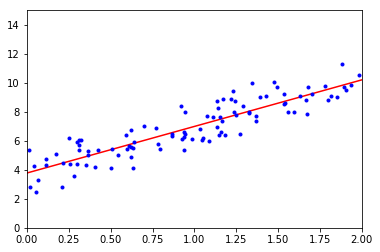

In [6]:
plt.plot(X_new, y_pred, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 3.7799554]), array([[ 3.21195542]]))

In [8]:
lin_reg.predict(X_new)

array([[  3.7799554 ],
       [ 10.20386625]])

# Gradient Descent

## Batch Gradient Descent
$$
\frac{\partial}{\partial \theta_j}MSE(\theta)=\frac{2}{m}\sum_{i=1}^{m}(\theta^T x^{(i)} - y^{(i)})x_j^{(i)}
$$

$$
\nabla_{\theta}MSE(\theta)=\frac{2}{m}X^T (X\theta - y)
$$

In [9]:
learning_rate = 0.1
n_epochs = 1000
m = 100
theta = np.random.randn(2,1)
for epochs in range(n_epochs):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate*gradients

In [10]:
theta

array([[ 3.7799554 ],
       [ 3.21195542]])

## Stochastic Gradient Descent

In [12]:
n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradient = 2 / 1 * xi.T.dot(xi.dot(theta) -yi)
        learning_rate = learning_schedule(epoch * m + i)
        theta = theta - learning_rate * gradient

In [13]:
theta

array([[ 3.74456229],
       [ 3.21481434]])

## Mini-batch Gradient Descent

In [23]:
m, n = X_b.shape
batch_size = 20
n_batches = int(np.ceil(m / batch_size))
def fetch_data(epoch, batch_idx, batch_size):
    np.random.seed(42+epoch*batch_idx)
    indices = np.random.randint(m, size=batch_size)
    return X_b[indices], y[indices].reshape(-1,1)

In [28]:
n_epoch = 10000
theta = np.random.randn(2,1)
for epoch in range(n_epoch):
    for batch in range(n_batches):
        X_batch, y_batch = fetch_data(epoch, batch, batch_size)
        gradient = 2/batch_size * X_batch.T.dot(X_batch.dot(theta) - y_batch)
        learing_rate = learning_schedule(epoch*n_batches+batch)
        theta = theta - learing_rate * gradient

In [29]:
theta

array([[ 3.88568782],
       [ 3.16741953]])

# Polynomial Regression

In [30]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

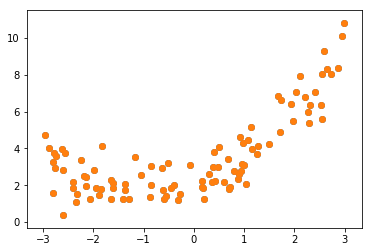

In [32]:
plt.scatter(X, y)
plt.show()

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly_featrues = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_featrues.fit_transform(X)
X[0]

array([ 2.53590449])

In [39]:
X_poly[0]

array([ 2.53590449,  6.43081157])

In [40]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 2.15617027]), array([[ 0.96289516,  0.48178778]]))

In [44]:
x = np.linspace(-3, 3, 100).reshape(100, 1)
y_pred = lin_reg.predict(poly_featrues.fit_transform(x))

In [45]:
plt.scatter(X, y)
plt.plot(x, y_pred)

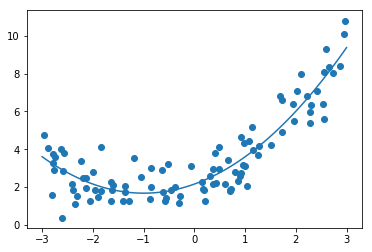

In [46]:
plt.show()

# Learning Curve

In [50]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_absolute_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_absolute_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend(loc='best')

In [51]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

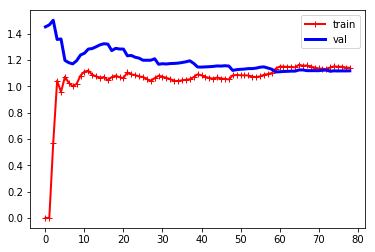

In [52]:
plt.show()

In [54]:
from sklearn.pipeline import Pipeline
polynomial_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('sdg_reg', LinearRegression())
])
plot_learning_curves(polynomial_pipe, X, y)

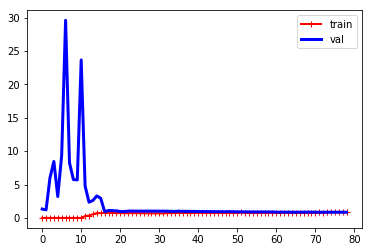

In [55]:
plt.show()

# Regularized Linear Model
### Ridge Regression
$$
J(\Theta)=MSE(\theta)+\alpha \frac{1}{2}\sum_{i=1}^{n}\theta_i^2
$$

In [56]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
params = [
    {'alpha':[0.1, 1, 10]}
]
ridge = Ridge(solver='cholesky')
grid_search = GridSearchCV(ridge, params, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X, y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] alpha=0.1 .......................................................
[CV] alpha=0.1 .......................................................
[CV] alpha=0.1 .......................................................
[CV] alpha=1 .........................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] alpha=10 ........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=10 ........................................................
[CV] .............

[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.1s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'alpha': [0.1, 1, 10]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=2)

In [58]:
grid_search.best_estimator_

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

### Lasso Regression
$$
J(\Theta)=MSE(\theta)+\alpha\sum_{i=1}^{n}|\theta_i|
$$

In [60]:
from sklearn.linear_model import Lasso
params = [
    {'alpha':[0.1, 1, 10]}
]
lasso = Lasso()
grid_search = GridSearchCV(lasso, params, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X, y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] alpha=0.1 .......................................................
[CV] alpha=0.1 .......................................................
[CV] alpha=1 .........................................................
[CV] alpha=0.1 .......................................................
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] .......................................... alpha=1, total=   0.0s
[CV] ........................................ alpha=0.1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] alpha=1 .........................................................
[CV] alpha=10 ........................................................
[CV] alpha=10 ........................................................
[CV] ......................................... alpha=10, total=   0.0s
[CV] .............

[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.1s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'alpha': [0.1, 1, 10]}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=2)

In [61]:
grid_search.best_estimator_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### Elastic Net
$$
J(\Theta)=MSE(\theta)+\gamma\alpha\sum_{i=1}^{n}|\theta_i|+\frac{1-\gamma}{2}\alpha\sum_{i=1}^{n}\theta_i^2
$$

In [62]:
from sklearn.linear_model import ElasticNet
params=[
    {'alpha':[0.1,1,10], 'l1_ratio':[0.2, 0.5, 0.8]},
]
elastic_net = ElasticNet()
grid_search = GridSearchCV(elastic_net, params, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X, y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] alpha=0.1, l1_ratio=0.2 .........................................
[CV] alpha=0.1, l1_ratio=0.2 .........................................
[CV] alpha=0.1, l1_ratio=0.2 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.2, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.2, total=   0.0s
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] .......................... alpha=0.1, l1_ratio=0.2, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.8 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l

[Parallel(n_jobs=-1)]: Done   6 out of  27 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    0.1s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'alpha': [0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [63]:
grid_search.best_estimator_

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.2,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

# Logitstic Regression

- cost function
$$
J(\Theta)=-\frac{1}{m}\sum_{i=1}^{m}\big[y^{(i)}log(\hat{p}^{(i)}) + (1-y^{i})log(1-\hat{p}^{(i)})\big]
$$

In [64]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris)

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [66]:
X = iris['data'][:, 3:]
y = (iris['target']==2).astype(np.int)

In [67]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

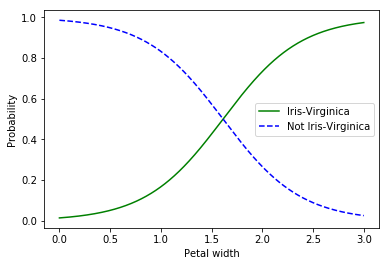

In [69]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')
plt.legend(loc='best')
plt.xlabel('Petal width')
plt.ylabel('Probability')
plt.show()

# Softmax Regression

In [71]:
X = iris['data'][:, (2,3)]
y = iris['target']
softmax_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_regression.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)